<p style="text-align:center">
    <a href="https://www.linkedin.com/company/mt-learners/?viewAsMember=true" target="_blank">
    <img src="https://github.com/Mr-MeerMoazzam/Mr-MeerMoazzam/blob/main/Untitled-2.jpg?raw=true" width="150" alt="MT Learners"  />
    </a>
</p>

# Encoding Numerical Features

There are two main methods to encode numerical features
1) Discritization
2) Binarization

# Discretization

Discretization is the process of transforming the continous variables into discrete variables by creating a set of contiguous intervals that span teh range of the vriable's value. Discretization is also called binning, where bin is an alternative name of a interval.

Why use bin?
1) To handel Outliers
2) To improve the value spread

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [3]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [4]:
df.dropna(inplace=True)

In [5]:
df.shape

(714, 3)

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


# Without using binning

In [9]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
X_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [16]:
clf=DecisionTreeClassifier()

In [17]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
y_pred=clf.predict(X_test)

In [19]:
accuracy_score(y_pred,y_test)

0.6363636363636364

In [21]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6401017214397496

# Applaying binning

In [33]:
Kbin_age=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
Kbin_fare=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

In [34]:
trf=ColumnTransformer([
    ('first',Kbin_age,[0]),
    ('second',Kbin_fare,[1])
])

In [35]:
X_train_trf=trf.fit_transform(X_train)
X_test_trf=trf.fit_transform(X_test)

In [36]:
trf.named_transformers_

{'first': KBinsDiscretizer(encode='ordinal', n_bins=10),
 'second': KBinsDiscretizer(encode='ordinal', n_bins=10)}

In [37]:
trf.named_transformers_['first'].n_bins_

array([10])

In [38]:
trf.named_transformers_['first'].bin_edges_

array([array([ 1. , 11. , 17. , 20.6, 24. , 28. , 30.1, 34.4, 38.6, 47.8, 62. ])],
      dtype=object)

In [39]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.     ,   7.74336,   7.925  ,   8.6625 ,  10.5    ,  14.4542 ,
               22.62   ,  28.39   ,  38.1    ,  57.78336, 512.3292 ])          ],
      dtype=object)

In [41]:
output=pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1],
    
})

In [44]:
output['age_label']=pd.cut(x=X_train['Age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_label']=pd.cut(x=X_train['Fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [46]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_label,fare_label
209,40.0,7.0,31.0000,7.0,"(38.6, 47.8]","(28.39, 38.1]"
127,24.0,3.0,7.1417,0.0,"(20.6, 24.0]","(0.0, 7.743]"
120,21.0,2.0,73.5000,8.0,"(20.6, 24.0]","(57.783, 512.329]"
594,37.0,7.0,26.0000,6.0,"(34.4, 38.6]","(22.62, 28.39]"
343,25.0,4.0,13.0000,4.0,"(24.0, 28.0]","(10.5, 14.454]"


# Applaying DecisionTree after the Binning

In [47]:
clf=DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)

DecisionTreeClassifier()

In [48]:
y_pred2=clf.predict(X_test_trf)

In [49]:
accuracy_score(y_test,y_pred2)

0.6853146853146853

# Function for Discretization

In [50]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()
    

0.6288732394366197


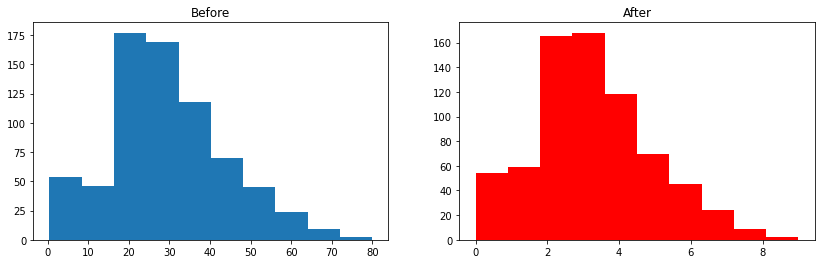

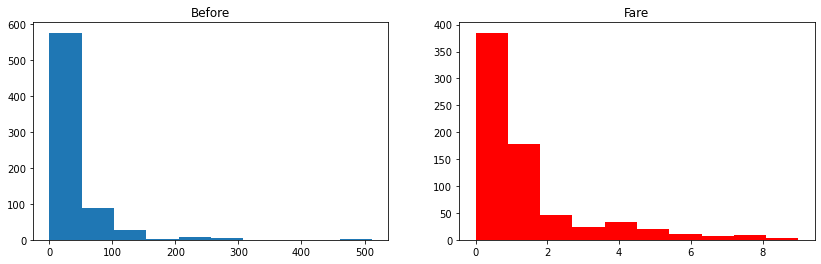

In [51]:
discretize(10,'kmeans')

0.6359154929577464


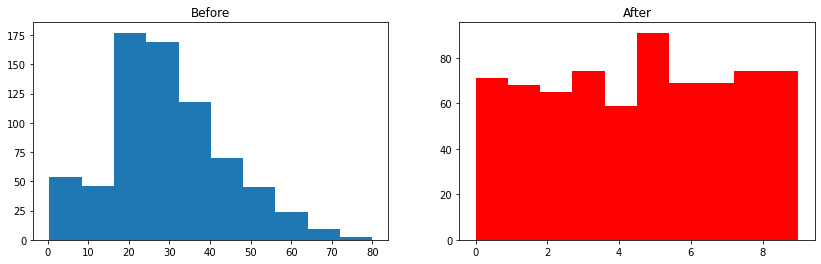

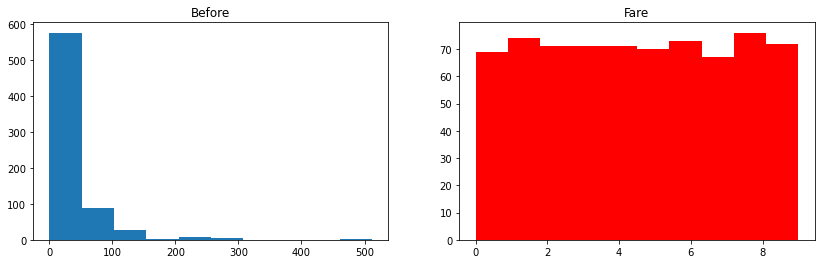

In [52]:
discretize(10,'quantile')

0.6317097026604068


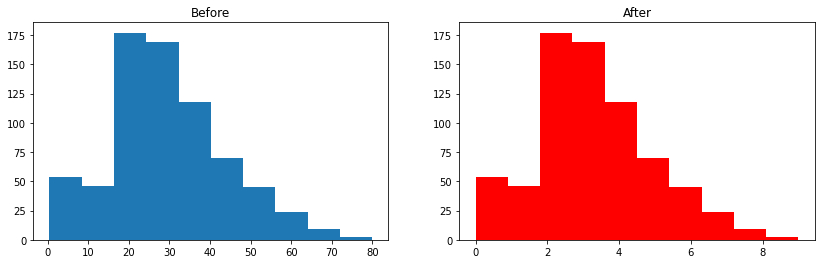

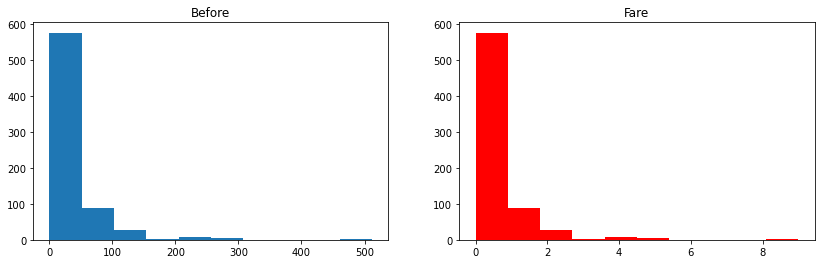

In [53]:
discretize(10,'uniform')

# Binarization

inarization is the process of transforming data features of any entity into vectors of binary numbers to make classifier algorithms more efficient. In a simple example, transforming an image's gray-scale from the 0-255 spectrum to a 0-1 spectrum is binarization.

In [54]:
df = pd.read_csv('train.csv')[['Age','Fare','SibSp','Parch','Survived']]

In [55]:
df.dropna(inplace=True)

In [56]:
df.head()

,Age,Fare,SibSp,Parch,Survived
0,22.0,7.2500,1,0,0
1,38.0,71.2833,1,0,1
2,26.0,7.9250,0,0,1
3,35.0,53.1000,1,0,1
4,35.0,8.0500,0,0,0


In [57]:
df['family'] = df['SibSp'] + df['Parch']

In [58]:
df.head()

,Age,Fare,SibSp,Parch,Survived,family
0,22.0,7.2500,1,0,0,1
1,38.0,71.2833,1,0,1,1
2,26.0,7.9250,0,0,1,0
3,35.0,53.1000,1,0,1,1
4,35.0,8.0500,0,0,0,0


In [59]:
df.drop(columns=['SibSp','Parch'],inplace=True)

In [60]:
df.head()

,Age,Fare,Survived,family
0,22.0,7.2500,0,1
1,38.0,71.2833,1,1
2,26.0,7.9250,1,0
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [61]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [63]:
# Without binarization

clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_test,y_pred)

0.6293706293706294

In [66]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6527582159624413

In [67]:
# Applying Binarization

from sklearn.preprocessing import Binarizer

In [68]:
trf = ColumnTransformer([
    ('bin',Binarizer(copy=False),['family'])
],remainder='passthrough')

In [74]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [75]:
pd.DataFrame(X_train_trf,columns=['family','Age','Fare'])

,family,Age,Fare
0,1.0,31.0,20.5250
1,1.0,26.0,14.4542
2,1.0,30.0,16.1000
3,0.0,33.0,7.7750
4,0.0,25.0,13.0000
...,...,...,...
566,1.0,46.0,61.1750
567,0.0,25.0,13.0000
568,0.0,41.0,134.5000
569,1.0,33.0,20.5250


In [71]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

accuracy_score(y_test,y_pred2)

0.6153846153846154

In [73]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy'))

0.6317879499217527

# Thank you 
## Author

<a href="https://www.linkedin.com/in/muhammad-zaman-ali-a22946208/" target="_blank">Muhammad Zaman Ali</a>

<hr>

## <h3 align="center"> © <a href="https://www.linkedin.com/company/mt-learners/" target="_blank">Mt Learners</a> 2022. All rights reserved. <h3/>